In [2]:
import re 
import jieba
import random
import pandas as pd 
import numpy as np 
from collections import defaultdict
from collections import Counter
import matplotlib.pyplot as plt
% %matplotlib inline

UsageError: Line magic function `%` not found.


In [3]:
simple_grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => Adj | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [4]:
hello_rules = '''
say_hello = names hello tail 
names = name names | name
name = Jhon | Mike | 老梁 | 老刘 
hello = 你好 | 您来啦 | 快请进
tail = 呀 | ！
'''

In [5]:
def generate(grammar_rules, target):
    '''从语法树种查找匹配的回答'''
    if target in grammar_rules:
        candidates = grammar_rules[target]
        candidate = random.choice(candidates)
        return ''.join(generate(grammar_rules, target=c.strip()) for c in candidate.split())
    else:
        return target
    
def get_generation_by_gram(grammar_str:str, target, stmt_split='=', or_split='|'):
    '''grammar_str:语法树
       target：
       stmt_split：分隔符
       or_split：分隔符 
    '''
    rules = dict()
    for line in grammar_str.split('\n'):
        if not line:
            continue
        stmt, expr = line.split(stmt_split)
        rules[stmt.strip()] = expr.split(or_split)
        
    generated = generate(rules, target=target)
    
    return generated
            
# rules = get_generation_by_gram(hello_rules, 'say_hello', stmt_split='=', or_split='|')      
# generate(rules, 'say_hello')   
get_generation_by_gram(hello_rules, 'say_hello', stmt_split='=', or_split='|')  

'Mike您来啦呀'

In [6]:
get_generation_by_gram(simple_grammar, 'sentence', stmt_split='=>', or_split='|')  

'这个蓝色的小猫看着这个好看的小猫'

In [7]:
# auto coding
simple_programming = '''
if_stmt => if ( cond ) { stmt }
cond => var op var
op => | == | < | >= | <= 
stmt => assign | if_stmt
assign => var = var
var =>  char var | char
char => a | b |  c | d | 0 | 1 | 2 | 3
'''
for i in range(20):
    print(get_generation_by_gram(simple_programming, 'if_stmt', stmt_split='=>', or_split='|')  )

if(1==0b2d){10d=303}
if(1<=0d){d=3}
if(0b==d0){3db=31}
if(03ddc==2){031=d2}
if(add<dcd1){if(0<=a3){ac31=d2}}
if(a<=13332b){if(2==33a){if(2a2==d){if(b>=1){33=0a}}}}
if(3d0){if(d3==cd){if(1c==cd){if(00<=1d){3d=bbbb}}}}
if(21a<1cb){baad=b0}
if(b>=0){1=ba}
if(3>=cd){b0=a}
if(b<=d){0a=31}
if(3<d){if(d==2){2=33}}
if(ab>=b){c=b}
if(1<=3c){1=dc}
if(3<=0acaa){323=ab}
if(3>=1b){if(2<0){a=b}}
if(d32<=ba){if(a3d3<2){d=c}}
if(cc0<3){2b=31}
if(23==d){if(d202==0){d=c}}
if(ada0){if(bad<=c2){bb=d}}


In [8]:
def name():
    return random.choice('Jhon | Mike | 老梁'.split('|'))
for i in range(5):
    print(name())

 老梁
 老梁
Jhon 
 老梁
 老梁


In [9]:
def hello():
    return random.choice('你好 | 您来啦 | 快请进'.split('|'))
for i in range(5):
    print(hello())

 您来啦 
 快请进
 快请进
 快请进
你好 


In [10]:
def say_hello():
    return name()+ ' ' + hello()
for i in range(5):
    print(say_hello())

 Mike   您来啦 
 Mike  你好 
Jhon   快请进
 老梁  快请进
 老梁 你好 


In [11]:
corpus = "./article_9k.txt"

In [12]:
%%time
contents = open(corpus,encoding='utf-8').read()
type(contents)

Wall time: 1.18 s


In [13]:
len(contents)

33425826

In [14]:
contents[:10]

'此外自本周6月12日'

In [64]:
# import jieba

In [15]:
max_length = 1000000 
sub_file = contents[:max_length]

In [16]:
%%time
# 用jieba 分词
TOKENS = jieba.lcut(contents)
type(TOKENS)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\acer9527\AppData\Local\Temp\jieba.cache
Loading model cost 1.269 seconds.
Prefix dict has been built succesfully.


Wall time: 3min 6s


In [17]:
TOKENS[:10]

['此外', '自', '本周', '6', '月', '12', '日起', '除', '小米', '手机']

In [18]:
%%time 
# 统计1元词频
words_count = Counter(TOKENS)

Wall time: 3.75 s


In [19]:
words_count.most_common(10)

[('的', 703716),
 ('n', 382020),
 ('在', 263597),
 ('月', 189330),
 ('日', 166300),
 ('新华社', 142462),
 ('和', 134061),
 ('年', 123106),
 ('了', 121938),
 ('是', 100909)]

In [20]:
words_with_freqences = [f for w,f in words_count.most_common()]

In [21]:
words_with_freqences[:10]

[703716,
 382020,
 263597,
 189330,
 166300,
 142462,
 134061,
 123106,
 121938,
 100909]

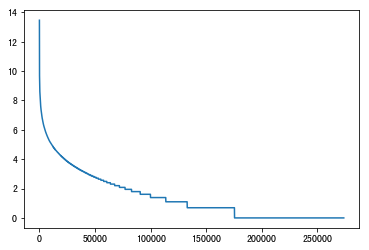

In [22]:
plt.plot(np.log(words_with_freqences))

In [23]:
jieba.lcut('一加手机5要做市面最轻薄')

['一加', '手机', '5', '要', '做', '市面', '最', '轻薄']

In [24]:
%%time
# 前一个和后一个拼接起来 形成2gram
_2_gram_words = [TOKENS[i] +TOKENS[i+1] for i in range(len(TOKENS)-1)]

Wall time: 8.29 s


In [25]:
_2_gram_words[:10]

['此外自', '自本周', '本周6', '6月', '月12', '12日起', '日起除', '除小米', '小米手机', '手机6']

In [26]:
# 统计2 gram 词频
_2_gram_words_count = Counter(_2_gram_words)

In [27]:
words_count.most_common()[-1]

('流年', 1)

In [28]:
def get_1_gram_count(word):
    '''获取1_gram的词频 
    如果Word存在词典中返回词频
    否则 返回 词频最小的那个数 '''
    if word not in words_count:
        return words_count.most_common()[-1][-1]
    else:
        return words_count[word]
    
def get_2_gram_count(word):
    '''获取2_gram的词频
        如果Word存在词典中返回词频
    否则 返回 词频最小的那个数 '''
    
    if word not in _2_gram_words_count:
        return _2_gram_words_count.most_common()[-1][-1]
    else:
        return _2_gram_words_count[word]

In [29]:
def get_gram_count(word, wc):
    ''' 从传入的 词典中查找 给定词的词频
        word:需要查询的词
        wc: word count
        融合了N_gram的方法 
    '''
    if word in wc:
        return wc[word]
    else:
        return wc.most_common()[-1][-1]

In [30]:
get_gram_count('xxx', words_count)

2

In [31]:
get_gram_count('xxx', _2_gram_words_count)

1

In [32]:
def two_gram_model(sentence):
    ''' 获取给定句子 2gram 的概率
    sentence: 需要计算概率的句子
    '''
    # 切词
    token = jieba.lcut(sentence)
    
    probability = 1 
    
    for i in range(len(token)-1 ):
        word = token[i]
        
        next_word = token[i+1]
        
        _two_gram_c = get_gram_count(word+next_word, _2_gram_words_count)
        
        _one_gram_c = get_gram_count(next_word, words_count)# 为什么是 next_word？？
        
        pro = _two_gram_c / _one_gram_c  # 不应该是 _2_gram_words_count 词典大小吗？？
        
        probability *= pro 
        
    return probability

In [33]:
two_gram_model('此外自本周6月12日起除小米手机6等15款机型')  

4.741787766101897e-37

In [34]:
two_gram_model('前天早上吃晚饭的时候')

6.239387998125227e-10

In [35]:
two_gram_model('前天早上吃早饭的时候')

2.3509374521948863e-13

不科学呀？？ 是语料库太小吗？

In [36]:
two_gram_model('我请你吃火锅')

8.497849335963889e-07

In [37]:
two_gram_model('我请你吃日料大餐')

4.872460383977198e-10

In [38]:
two_gram_model('这个人来自清华大学')

1.364629466681511e-07

In [39]:
two_gram_model('这个人来自秦华大学')

4.607121764623602e-10

In [40]:
two_gram_model('这个花特别好看')

1.3702130336795815e-09

In [41]:
two_gram_model('花这特别好看')

6.397130259238779e-11

In [42]:
for sen in [get_generation_by_gram(simple_grammar,'sentence', stmt_split='=>', or_split='|') for _ in range(10)]:
    print('sentence: {} with prob: {}'.format(sen, two_gram_model(sen)))

sentence: 一个好看的蓝色的篮球看着一个好看的小猫 with prob: 2.0574830941906373e-27
sentence: 一个好看的蓝色的小猫坐在这个小小的好看的桌子 with prob: 1.347855598972603e-27
sentence: 一个蓝色的桌子坐在这个好看的篮球 with prob: 8.634099335303037e-24
sentence: 这个好看的桌子坐在这个蓝色的篮球 with prob: 8.634099335303037e-24
sentence: 这个蓝色的小猫看见一个蓝色的篮球 with prob: 1.1785864248617108e-22
sentence: 一个好看的桌子看着这个小小的蓝色的小小的好看的好看的好看的篮球 with prob: 9.828123416912974e-45
sentence: 这个好看的蓝色的小猫坐在一个蓝色的小小的篮球 with prob: 2.1163832873437077e-31
sentence: 这个好看的小小的小猫听着这个蓝色的蓝色的好看的蓝色的蓝色的桌子 with prob: 1.0466846666432414e-47
sentence: 这个蓝色的小小的小猫看着这个小小的桌子 with prob: 3.633204988117069e-20
sentence: 这个好看的蓝色的蓝色的蓝色的小猫听着一个蓝色的篮球 with prob: 1.251575610479878e-38


In [43]:
sentences_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "今晚我去吃火锅 今晚火锅去吃我",
    "洋葱奶昔来一杯 养乐多绿来一杯"
]

for s in sentences_compared:
    s1, s2 = s.split()
    p1, p2 =  two_gram_model(sen),two_gram_model(sen)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

明天晚上请你吃大餐，我们一起吃苹果 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probility 1.251575610479878e-38
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 1.251575610479878e-38
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 1.251575610479878e-38
---- 真是一只好看的小猫 with probility 1.251575610479878e-38
今晚火锅去吃我 is more possible
---- 今晚我去吃火锅 with probility 1.251575610479878e-38
---- 今晚火锅去吃我 with probility 1.251575610479878e-38
养乐多绿来一杯 is more possible
---- 洋葱奶昔来一杯 with probility 1.251575610479878e-38
---- 养乐多绿来一杯 with probility 1.251575610479878e-38


感觉结果和想象中的不一样呢？

# 定义你自己的语法

In [44]:
Self_gram = """
person_info = 姓名 程度副词* 擅长 特点
姓名 = 刘邦 | 韩信| 项羽| 秦始皇
程度副词* =  程度副词|  程度副词*
程度副词 = 很 | 非常 | 特别 | 极其| 总是
擅长 = 喜欢 | 善于 | 擅长| 热衷
特点 = 统兵打仗 | 统帅 | 打仗 | 屠杀功臣| 自以为是| 分封诸侯| 泰山封禅| 周游天下| 灭国大战
"""
get_generation_by_gram(Self_gram, 'person_info', stmt_split='=', or_split='|')  

'韩信很善于自以为是'

In [45]:
def get_generation_n_by_gram(grammar, target, n):
    """根据语法树产生n条语句"""
    result = []
    for i in range(n):
        sentence = get_generation_by_gram(grammar, target=target, stmt_split='=', or_split='|') 
        result.append(sentence)
        
    return result
sentences_n = get_generation_n_by_gram(Self_gram, 'person_info', 5)

In [46]:
sentences_n

['刘邦总是喜欢自以为是', '项羽总是热衷统帅', '刘邦总是喜欢屠杀功臣', '韩信总是善于周游天下', '刘邦很善于打仗']

# 获得最优质的的语言

In [47]:
def generate_best(grammar, target, n):
    '''该函数输入一个语法 + 语言模型，能够生成n个句子，并能选择一个最合理的句子
    '''
    sentences = []
    for i in range(n):
        sentence = get_generation_by_gram(grammar, target=target, stmt_split='=', or_split='|') 
        sentences.append(sentence)
        
    result = [(sentence, two_gram_model(sen)) for sentence in sentences]
    
    sorted(result, key=lambda x: x[1], reverse=True)
    
    return result[0],result
best,all_result = generate_best(Self_gram, 'person_info', 5)
print("best:",best,'\n')
for item in all_result:
    print('-'*4 + ' {} with probility {}'.format(item[0], item[1]))

best: ('刘邦很善于屠杀功臣', 1.251575610479878e-38) 

---- 刘邦很善于屠杀功臣 with probility 1.251575610479878e-38
---- 秦始皇特别善于屠杀功臣 with probility 1.251575610479878e-38
---- 秦始皇很热衷泰山封禅 with probility 1.251575610479878e-38
---- 刘邦特别喜欢屠杀功臣 with probility 1.251575610479878e-38
---- 刘邦极其善于自以为是 with probility 1.251575610479878e-38


# 2. 使用新数据源完成语言模型的训练

In [48]:
copurs_data = pd.read_csv("./movie_comments.csv")

D:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [49]:
copurs_data.shape

(261497, 5)

In [50]:
copurs_data.dtypes

id         object
link       object
name       object
comment    object
star       object
dtype: object

In [51]:
copurs_data.head()

,id,link,name,comment,star
0,1,https://movie.douban.com/subject/26363254/,战狼2,吴京意淫到了脑残的地步，看了恶心想吐,1
1,2,https://movie.douban.com/subject/26363254/,战狼2,首映礼看的。太恐怖了这个电影，不讲道理的，完全就是吴京在实现他这个小粉红的英雄梦。各种装备轮...,2
2,3,https://movie.douban.com/subject/26363254/,战狼2,吴京的炒作水平不输冯小刚，但小刚至少不会用主旋律来炒作…吴京让人看了不舒服，为了主旋律而主旋...,2
3,4,https://movie.douban.com/subject/26363254/,战狼2,凭良心说，好看到不像《战狼1》的续集，完虐《湄公河行动》。,4
4,5,https://movie.douban.com/subject/26363254/,战狼2,中二得很,1


In [52]:
copurs_data.name.nunique()

2760

In [53]:
def data_preprocessinng(content):
    '''去除文本中的非汉字字符'''
    return ''.join(re.findall('\w+',content))

In [54]:
%%time
# 文本清洗 去除非汉字字符
copurs_data['comment'] = copurs_data['comment'].apply(lambda x: data_preprocessinng(str(x)))

Wall time: 972 ms


In [55]:
copurs_data.head()

,id,link,name,comment,star
0,1,https://movie.douban.com/subject/26363254/,战狼2,吴京意淫到了脑残的地步看了恶心想吐,1
1,2,https://movie.douban.com/subject/26363254/,战狼2,首映礼看的太恐怖了这个电影不讲道理的完全就是吴京在实现他这个小粉红的英雄梦各种装备轮番上场视...,2
2,3,https://movie.douban.com/subject/26363254/,战狼2,吴京的炒作水平不输冯小刚但小刚至少不会用主旋律来炒作吴京让人看了不舒服为了主旋律而主旋律为了...,2
3,4,https://movie.douban.com/subject/26363254/,战狼2,凭良心说好看到不像战狼1的续集完虐湄公河行动,4
4,5,https://movie.douban.com/subject/26363254/,战狼2,中二得很,1


In [56]:
%%time
# 提取所有comments
all_comment = ''.join(copurs_data.comment.tolist())

Wall time: 49.9 ms


In [57]:
%%time
# 切词
all_token_list = jieba.lcut(all_comment)

Wall time: 2min 29s


In [58]:
# 生成2gram语料
_2_gram_words_new = [all_token_list[i] +all_token_list[i+1] for i in range(len(all_token_list)-1)]
_2_gram_words_count = Counter(_2_gram_words_new)

In [59]:
_1_gram_words_count = Counter(all_token_list)

In [60]:
def prob_1(word,words_freq_counter):
    '''1gram'''
    return _1_gram_words_count[word] / sum(words_freq_counter.values()) if word in _1_gram_words_count else 1/sum(words_freq_counter.values())

In [61]:
prob_1('我们',_1_gram_words_count)

0.001309328166445808

In [62]:
all_token_list[:10]

['吴京', '意淫', '到', '了', '脑残', '的', '地步', '看', '了', '恶心']

In [63]:
prob_1('吹牛',_1_gram_words_count)

6.685931062701999e-06

In [64]:
# 改进2gram函数：使得它对所有新的 2 gram语料库兼容 General purpose
def two_gram_model_general(sentence,_1_gram_words_count,  _2_gram_words_count):
    ''' 获取二元词的概率
    sentence:
    '''
    # 切词
    token = jieba.lcut(sentence)
    
    probability = 1 
    
    for i in range(len(token)-1 ):
        word = token[i]
        
        next_word = token[i+1]
        
        _two_gram_c = get_gram_count(word+next_word, _2_gram_words_count)
        
        _one_gram_c = get_gram_count(next_word, _1_gram_words_count)# 为什么是 next_word？？
        
        pro = _two_gram_c / _one_gram_c  # 不应该是 _2_gram_words_count 词典大小吗？？
        
        probability *= pro 
        
    return probability

def generate_best_general(grammar, target, n):
    '''该函数输入一个语法 + 语言模型，能够生成n个句子，并能选择一个最合理的句子
    '''
    sentences = []
    for i in range(n):
        sentence = get_generation_by_gram(grammar, target=target, stmt_split='=', or_split='|') 
        sentences.append(sentence)
        
    result = [(sentence, two_gram_model_general(sen,_1_gram_words_count ,_2_gram_words_count)) for sentence in sentences]
    
    sorted(result, key=lambda x: x[1], reverse=True)
    
    return result[0],result

best,all_result = generate_best_general(Self_gram, 'person_info', 5)
print("best:",best,'\n')
for item in all_result:
    print('-'*4 + ' {} with probility {}'.format(item[0], item[1]))

best: ('项羽特别热衷打仗', 6.159629219289829e-35) 

---- 项羽特别热衷打仗 with probility 6.159629219289829e-35
---- 刘邦非常善于周游天下 with probility 6.159629219289829e-35
---- 秦始皇总是热衷统兵打仗 with probility 6.159629219289829e-35
---- 韩信极其喜欢屠杀功臣 with probility 6.159629219289829e-35
---- 韩信极其热衷统帅 with probility 6.159629219289829e-35


In [65]:
new_gram = """
person_info = 姓名 程度副词* 擅长 特点
姓名 =高晓松 | 岳云鹏| 于谦
程度副词* = null | 程度副词 程度副词*
程度副词 = 很 | 非常 | 特别 | 极其
擅长 = 喜欢 | 善于 | 擅长
特点 = 作词 | 作曲 | 喝酒 | 损人| 说相声| 拍电影
"""
best,all_result = generate_best_general(new_gram, 'person_info', 5)
print("best:",best,'\n')
for item in all_result:
    print('-'*4 + ' {} with probility {}'.format(item[0], item[1]))

best: ('高晓松很非常null善于说相声', 6.159629219289829e-35) 

---- 高晓松很非常null善于说相声 with probility 6.159629219289829e-35
---- 岳云鹏null喜欢拍电影 with probility 6.159629219289829e-35
---- 岳云鹏null善于损人 with probility 6.159629219289829e-35
---- 岳云鹏特别null喜欢说相声 with probility 6.159629219289829e-35
---- 岳云鹏null善于作词 with probility 6.159629219289829e-35


In [66]:
need_compared = [
    '这个电影真好看 这个电影正好看',
    '晚上一起去看电影啊 一起去看晚上的电影啊',
    '这个电影还行吧 这个电影也就一般般吧',
    '太狗血了这个电影 这个电影拍的跟屎一样'
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = two_gram_model_general(s1,_1_gram_words_count,  _2_gram_words_count),two_gram_model_general(s2,_1_gram_words_count,  _2_gram_words_count)

    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

这个电影真好看 is more possible
---- 这个电影真好看 with probility 5.232056201773159e-06
---- 这个电影正好看 with probility 6.359638906607634e-09
晚上一起去看电影啊 is more possible
---- 晚上一起去看电影啊 with probility 2.376825382615988e-11
---- 一起去看晚上的电影啊 with probility 6.263654551953375e-13
这个电影还行吧 is more possible
---- 这个电影还行吧 with probility 5.177673459742868e-06
---- 这个电影也就一般般吧 with probility 2.744540398580013e-09
太狗血了这个电影 is more possible
---- 太狗血了这个电影 with probility 3.4263808433000927e-08
---- 这个电影拍的跟屎一样 with probility 8.15996101542436e-12


generate_best(self_definition_grammer, tokens_2gram_counter, 'self_info', 5) 

Q: 这个模型有什么问题？ 你准备如何提升？

Ans: 1.语言模型用到的预料是影评领域的，所以用来预测评价电影的句子合理性比较合适，不能泛化到其他的领域.
如果要泛化到其他领域，用来计算的词频语料要覆盖跟多领域的语料

# (Optional) 完成基于Pattern Match的语句问答

In [67]:
def is_variable(pat):
    '''判断 pat s否满足固定的模式
    规则：pat 是？开头 并且除？之外都市字母
    '''
    return pat.startswith('?') and all(s.isalpha() for s in pat[1:])

def pat_match(pattern, saying):
    '''从头开始逐个比较pattern,和saying 检查 saying是否满足pattern bin的模式
    '''
    if is_variable(pattern[0]):
        return True
    else:
        if pattern[0] != saying[0]:
            return False
        else:
            return pat_match(pattern[1:], saying[1:])
        

In [68]:
pat_match('I want ?X'.split(), "I want holiday".split())

True

In [69]:
pat_match('I have dreamed a ?X'.split(), "I dreamed about dog".split()) #false

False

In [70]:
pat_match('I dreamed about ?X'.split(), "I dreamed about dog".split())#True

True

# 获得匹配的变量:以上的函数能够判断两个 pattern 是不是相符，但是我们更加希望的是获得每个variable对应的是什么值

In [71]:
def pat_match(pattern, saying):
    '''匹配的同时 保存模式对应的值'''
    if is_variable(pattern[0]):
        return pattern[0],saying[0] # 返回 pattern和对应的值，这一概念以来就可以同时匹配多个模式
    else:
        if pattern[0] != saying[0]:
            return False
        else:
            return pat_match(pattern[1:], saying[1:])
        

In [72]:
pattern = 'I want ?X'.split()
saying = "I want holiday".split()
pat_match(pattern, saying)

('?X', 'holiday')

In [73]:
pat_match("?X equals ?X".split(), "2+2 equals 2+2".split())

('?X', '2+2')

In [74]:
# 但是，如果我们的 Pattern 中具备两个变量，那么以上程序就不能解决了，我们可以对程序做如下修改:
pat_match("?X equals ?Y".split(), "2+2 equals 2*2".split())

('?X', '2+2')

In [75]:
def pat_match(pattern, saying):
    '''当有多个模式的时候，前面匹配上了，后面会接着匹配，直到完成为止'''
    if not pattern or not saying:
        return []
    if is_variable(pattern[0]):
        return [(pattern[0], saying[0])] + pat_match(pattern[1:], saying[1:])
    else:
        return pat_match(pattern[1:], saying[1:])

In [76]:
pat_match("?X equals ?Y".split(), "2+2 equals 2*2".split())

[('?X', '2+2'), ('?Y', '2*2')]

如果我们知道了每个变量对应的是什么，那么我们就可以很方便的使用我们定义好的模板进行替换：

为了方便接下来的替换工作，我们新建立两个函数，一个是把我们解析出来的结果变成一个 dictionary，一个是依据这个 dictionary 依照我们的定义的方式进行替换

In [77]:
def pat_to_dict(patterns):
    '''把模式转换成字段方便查找和替换
    v2: r如果是单模式匹配多个单词 就拼接 '''
    return {k: ' '.join(v) if isinstance(v, list) else v for k, v in patterns}
#     return {k:v for k,v in patterns}

def subsitite(rule, parsed_rules):
    '''把句子中出现的模式映射回该模式对用的值'''
    if not rule:
        return []
    return [parsed_rules.get(rule[0], rule[0])] + subsitite(rule[1:], parsed_rules)# 巧妙 递归的运用：如果当前词不再映射表中说明当前词不是模式，返回本身

In [78]:
got_patterns = pat_match("I want ?X".split(), "I want iPhone".split())
print(got_patterns)
subsitite("What if you mean if you got a ?X".split(), pat_to_dict(got_patterns))

[('?X', 'iPhone')]


['What', 'if', 'you', 'mean', 'if', 'you', 'got', 'a', 'iPhone']

In [79]:
' '.join(subsitite("What if you mean if you got a ?X".split(), pat_to_dict(got_patterns)))

'What if you mean if you got a iPhone'

In [80]:
def sentence_subsitite(sentence, parsed_rules):
    '''把句子中出现的模式映射回该模式对用的值'''
    return ' '.join(subsitite(sentence.split(), pat_to_dict(parsed_rules)))

print(sentence_subsitite("What if you mean if you got a ?X", got_patterns))

What if you mean if you got a iPhone


In [81]:

print(sentence_subsitite("Why does ?P need ?X ?", 
                         pat_match('?P needs ?X'.split(), "John needs vacation".split())
                        )
     )

Why does John need vacation ?


In [82]:
pat_match('?P needs ?X'.split(), "John needs vacation".split())

[('?P', 'John'), ('?X', 'vacation')]

In [83]:
def pat_match(pattern, saying):
    '''当有多个模式的时候，前面匹配上了，后面会接着匹配，知道完成为止'''

    if not pattern or not saying:
        return []
    if is_variable(pattern[0]):
        return [(pattern[0], saying[0])] + pat_match(pattern[1:], saying[1:])
    else:
        return pat_match(pattern[1:], saying[1:]) if pattern[0]== saying[0] else []
    
# 那么如果我们现在定义一些patterns，就可以实现基于模板的对话生成了
defined_patterns = {
    "I need ?X": ["Image you will get ?X soon", "Why do you need ?X ?"], 
    "My ?X told me something": ["Talk about more about your ?X", "How do you think about your ?X ?"]
}

def get_response(saying, rules):

    for pattern in rules:
#         print("pattern:",pattern,"saying:",saying)
        match_result = pat_match(pattern.split(),saying.split())
#         print("match_result: ",match_result)
        if match_result == []:
            continue 
        else:
            return sentence_subsitite(random.choice(rules[pattern]), 
                                      match_result
                                     )
        
print(get_response('I need iPhone', defined_patterns))
print(get_response("My mother told me something", defined_patterns))

Why do you need iPhone ?
How do you think about your mother ?


# Segment Match
我们上边的这种形式，能够进行一些初级的对话了，但是我们的模式逐字逐句匹配的， "I need iPhone" 和 "I need ?X" 可以匹配，但是"I need an iPhone" 和 "I need ?X" 就不匹配了，那怎么办？

为了解决这个问题，我们可以新建一个变量类型 "?\*X", 这种类型多了一个星号(\*),表示匹配多个

首先，和前文类似，我们需要定义一个判断是不是匹配多个的variable

In [84]:
def is_pattern_segment(pattern):
    '''一个模式匹配多个单词'''
    return pattern.startswith('?*') and all(a.isalpha() for a in pattern[2:])
print(is_pattern_segment('?*p'))

True


In [85]:
fail = [True,False]

def is_match(rest, saying):
    ''''''
    if not rest and not saying:
        # 如果带比较的2个串度到达了最后 说明匹配上了
        return True
    if not all(a.isalpha() for a in rest[0]):
        return True
    if rest[0] != saying[0]:
        return False
    return is_match(rest[1:], saying[1:])

def segment_match(pattern, saying):
    '''尽最大可能的匹配一个模式'''
    seg_pat, rest = pattern[0], pattern[1:]
    seg_pat = seg_pat.replace('?*', '?')
    
    if not rest:
        return (seg_pat, saying),len(saying)
    
    for i, token in enumerate(saying):
        if rest[0] == token and is_match(rest[1:], saying[(1+i):]):
            return (seg_pat, saying[:i]), i

    return (seg_pat, saying), len(saying)

def pat_match_with_seg(pattern, saying):
    ''' 一个模式匹配多个单词的情况
    pattern:
    saying:
    '''
#     print(pattern,saying)
    if not pattern and not saying:
        return []
    elif not saying and pattern:  # 不能 让 "I was real want a iphone" 和?*X hello ?*Y": 的匹配 一个模式匹配了所有的saying 这是不允许的
        return fail  
    
    pat = pattern[0]
    
    if is_variable(pat):
        return [(pat, saying[0])] + pat_match_with_seg(pattern[1:], saying[1:])
    
    elif is_pattern_segment(pat):
        match,index = segment_match(pattern, saying)
        return [match] + pat_match_with_seg(pattern[1:], saying[index:])
    elif pat == saying[0]:
        return pat_match_with_seg(pattern[1:], saying[1:])
    else:
        return fail
    

# segment_match('?*P is very good'.split(), "My dog and my cat is very good".split()) # (?*P, My dog and my cat) ,5   
# print(pat_match_with_seg("?*X hello ?*Y".split(), 'peter hello I need iPhone'.split()))  # ?*X hello ?*Y
print(pat_match_with_seg("?*X hello ?*Y".split(), 'I was real want a iphone'.split()))  # ?*X hello ?*Y
# print(get_response("I was real want a iphone", rules))  # I was ?*X

[('?X', ['I', 'was', 'real', 'want', 'a', 'iphone']), True, False]


In [86]:
pat_match_with_seg('?*P is very good and ?*X'.split(), "My dog is very good and my cat is very cute".split())

[('?P', ['My', 'dog']), ('?X', ['my', 'cat', 'is', 'very', 'cute'])]

In [87]:
response_pair = {
    'I need ?X': [ "Why do you neeed ?X" ],
    "I dont like my ?X": ["What bad things did ?X do for you?"]
}

pat_match_with_seg('I need ?*X'.split(), 
                  "I need an iPhone".split())

[('?X', ['an', 'iPhone'])]

In [88]:
sentence_subsitite("Why do you  need ?X", 
                   pat_match_with_seg('I need ?*X'.split(),"I need an iPhone".split())
                  )

'Why do you need an iPhone'

# 现在是你的时间了

In [90]:
#我们给大家一些例子: 
    
rules = {
    "?*X hello ?*Y": ["Hi, how do you do?"],
    "I was ?*X": ["Were you really ?X ?", "I already knew you were ?X ."]
}

# 问题1
编写一个程序, get_response(saying, response_rules)输入是一个字符串 + 我们定义的 rules，例如上边我们所写的 pattern， 输出是一个回答。

In [91]:
rules = {
    "?*X hello ?*Y": ["Hi, how do you do?"],
    "I was ?*X": ["Were you really ?X ?", "I already knew you were ?X ."]
}

def get_response(saying, rules):

    for pattern in rules:
        match_result = pat_match_with_seg(pattern.split(),saying.split())
        if match_result[-1]:
            return sentence_subsitite(random.choice(rules[pattern]), 
                                      match_result
                                     )
        
print(get_response('peter hello I need iPhone', rules))  # ?*X hello ?*Y
print(get_response("I was real want a iphone", rules))  # I was ?*X

Hi, how do you do?
I already knew you were real want a iphone .


# 问题2
改写以上程序，将程序变成能够支持中文输入的模式。 提示: 你可以需用用到 jieba 分词

In [92]:
def split_pattern_contain_chinese(sentence):
    '''使用递归实现
    ASCII码为标准符号、数字、英文等进行了保留，取值范围是0～127
    还有一部分作为扩展ASCII码128～255
    '''

    start = 0
    
    if len(sentence) ==  0:
        return []
    
    i = 1
    if ord(sentence[0]) <128:
        while (i < len(sentence)) and (ord(sentence[i]) <128):
                i +=1
    else:
        while (i < len(sentence)) and (ord(sentence[i]) >= 128):
                i +=1
    # 如果是中文就对中文进行分词
    if ord(sentence[0]) >= 128:
        temp = jieba.lcut(sentence[start:i])
    else:
        temp = [sentence[start:i]]

    return temp + split_pattern_contain_chinese(sentence[i:])

split_pattern_contain_chinese('?*x我想要?*y将程序变成能')

['?*x', '我', '想要', '?*y', '将', '程序', '变成', '能']

In [96]:
# 匹配中文回答
def get_chiness_respose(saying, rules):
    ''''''
    for pattern in rules:
        match_result = pat_match_with_seg(split_pattern_contain_chinese(pattern),
                                          split_pattern_contain_chinese(saying))
#         print(match_result)
        if match_result[-1]:
            return sentence_subsitite(random.choice(rules[pattern]), 
                                      match_result
                                     )

In [97]:
def pat_to_dict(patterns):
    '''把模式转换成字段方便查找和替换
    v3: r如果是单模式匹配多个单词 就拼接 中文拼接不需要空格 '''
    return {k: ''.join(v) if isinstance(v, list) else v for k, v in patterns}

def sentence_subsitite(sentence, parsed_rules):
    '''把句子中出现的模式映射回该模式对用的值
    中文拼接不需要空格'''
    return ''.join(subsitite(split_pattern_contain_chinese(sentence), pat_to_dict(parsed_rules)))

chinese_rules = {
    '?*x我想要?*y': ['?x想问你，你觉得?y有什么意义呢?', '为什么你想?y', '?x觉得... 你可以想想你很快就可以有?y了', '你看?x像?y不', '我看你就像?y'],
    '?*x喜欢?*y': ['喜欢?y的哪里？', '?y有什么好的呢？', '你想和?y在一起吗？'],
    '?*x讨厌?*y': ['?y怎么会那么讨厌呢?', '讨厌?y的哪里？', '?y有什么不好呢？', '你不想要?y吗？']
}
print(get_chiness_respose('我喜欢赵孟頫', chinese_rules))
print(get_chiness_respose('我讨厌学习', chinese_rules))

喜欢赵孟頫的哪里？
你不想要学习吗？


In [98]:
def chiness_dialogue(rules):
    '''实现中文对话'''
    while True:
        saying = input("路人甲: ")
        if saying.lower() not in ['bye','quit','q','exit']:
            respone=get_chiness_respose(saying, rules)
            print(f"路人乙:{respone}")
        else:
            print("路人乙:对不起，我什么也没看见，什么也没听到，我什么都不知道!!")
            break
chiness_dialogue(chinese_rules)

路人甲: q
路人乙:对不起，我什么也没看见，什么也没听到，我什么都不知道!!


# 问题3
多设计一些模式，让这个程序变得更好玩，多和大家交流，看看大家有什么好玩的模式

In [99]:
rule_responses = {
    '?*x hello ?*y': ['How do you do', 'Please state your problem'],
    '?*x I want ?*y': ['what would it mean if you got ?y', 'Why do you want ?y', 'Suppose you got ?y soon'],
    '?*x if ?*y': ['Do you really think its likely that ?y', 'Do you wish that ?y', 'What do you think about ?y', 'Really-- if ?y'],
    '?*x no ?*y': ['why not?', 'You are being a negative', 'Are you saying \'No\' just to be negative?'],
    '?*x I was ?*y': ['Were you really', 'Perhaps I already knew you were ?y', 'Why do you tell me you were ?y now?'],
    '?*x I feel ?*y': ['Do you often feel ?y ?', 'What other feelings do you have?'],
    '?*x你好?*y': ['你好呀', '请告诉我你的问题'],
    '?*x我想?*y': ['你觉得?y有什么意义呢？', '为什么你想?y', '你可以想想你很快就可以?y了'],
    '?*x我想要?*y': ['?x想问你，你觉得?y有什么意义呢?', '为什么你想?y', '?x觉得... 你可以想想你很快就可以有?y了', '你看?x像?y不', '我看你就像?y'],
    '?*x喜欢?*y': ['喜欢?y的哪里？', '?y有什么好的呢？', '你想要?y吗？'],
    '?*x讨厌?*y': ['?y怎么会那么讨厌呢?', '讨厌?y的哪里？', '?y有什么不好呢？', '你不想要?y吗？'],
    '?*xAI?*y': ['你为什么要提AI的事情？', '你为什么觉得AI要解决你的问题？'],
    '?*x机器人?*y': ['你为什么要提机器人的事情？', '你为什么觉得机器人要解决你的问题？'],
    '?*x对不起?*y': ['不用道歉', '你为什么觉得你需要道歉呢?'],
    '?*x我记得?*y': ['你经常会想起这个吗？', '除了?y你还会想起什么吗？', '你为什么和我提起?y'],
    '?*x如果?*y': ['你真的觉得?y会发生吗？', '你希望?y吗?', '真的吗？如果?y的话', '关于?y你怎么想？'],
    '?*x我?*z梦见?*y':['真的吗? --- ?y', '你在醒着的时候，以前想象过?y吗？', '你以前梦见过?y吗'],
    '?*x妈妈?*y': ['你家里除了?y还有谁?', '嗯嗯，多说一点和你家里有关系的', '她对你影响很大吗？'],
    '?*x爸爸?*y': ['你家里除了?y还有谁?', '嗯嗯，多说一点和你家里有关系的', '他对你影响很大吗？', '每当你想起你爸爸的时候， 你还会想起其他的吗?'],
    '?*x我愿意?*y': ['我可以帮你?y吗？', '你可以解释一下，为什么想?y'],
    '?*x我很难过，因为?*y': ['我听到你这么说， 也很难过', '?y不应该让你这么难过的'],
    '?*x难过?*y': ['我听到你这么说， 也很难过',
                 '不应该让你这么难过的，你觉得你拥有什么，就会不难过?',
                 '你觉得事情变成什么样，你就不难过了?'],
    '?*x就像?*y': ['你觉得?x和?y有什么相似性？', '?x和?y真的有关系吗？', '怎么说？'],
    '?*x和?*y都?*z': ['你觉得?z有什么问题吗?', '?z会对你有什么影响呢?'],
    '?*x和?*y一样?*z': ['你觉得?z有什么问题吗?', '?z会对你有什么影响呢?'],
    '?*x我是?*y': ['真的吗？', '?x想告诉你，或许我早就知道你是?y', '你为什么现在才告诉我你是?y'],
    '?*x我是?*y吗': ['如果你是?y会怎么样呢？', '你觉得你是?y吗', '如果你是?y，那一位着什么?'],
    '?*x你是?*y吗':  ['你为什么会对我是不是?y感兴趣?', '那你希望我是?y吗', '你要是喜欢， 我就会是?y'],
    '?*x你是?*y' : ['为什么你觉得我是?y'],
    '?*x因为?*y' : ['?y是真正的原因吗？', '你觉得会有其他原因吗?'],
    '?*x我不能?*y': ['你或许现在就能?*y', '如果你能?*y,会怎样呢？'],
    '?*x我觉得?*y': ['你经常这样感觉吗？', '除了到这个，你还有什么其他的感觉吗？'],
    '?*x我?*y你?*z': ['其实很有可能我们互相?y'],
    '?*x你为什么不?*y': ['你自己为什么不?y', '你觉得我不会?y', '等我心情好了，我就?y'],
    '?*x好的?*y': ['好的', '你是一个很正能量的人'],
    '?*x嗯嗯?*y': ['好的', '你是一个很正能量的人'],
    '?*x不嘛?*y': ['为什么不？', '你有一点负能量', '你说 不，是想表达不想的意思吗？'],
    '?*x不要?*y': ['为什么不？', '你有一点负能量', '你说 不，是想表达不想的意思吗？'],
    '?*x有些人?*y': ['具体是哪些人呢?'],
    '?*x有的人?*y': ['具体是哪些人呢?'],
    '?*x某些人?*y': ['具体是哪些人呢?'],
    '?*x每个人?*y': ['我确定不是人人都是', '你能想到一点特殊情况吗？', '例如谁？', '你看到的其实只是一小部分人'],
    '?*x所有人?*y': ['我确定不是人人都是', '你能想到一点特殊情况吗？', '例如谁？', '你看到的其实只是一小部分人'],
    '?*x总是?*y': ['你能想到一些其他情况吗?', '例如什么时候?', '你具体是说哪一次？', '真的---总是吗？'],
    '?*x一直?*y': ['你能想到一些其他情况吗?', '例如什么时候?', '你具体是说哪一次？', '真的---总是吗？'],
    '?*x或许?*y': ['你看起来不太确定'],
    '?*x可能?*y': ['你看起来不太确定'],
    '?*x他们是?*y吗？': ['你觉得他们可能不是?y？'],
    '?*x': ['很有趣', '请继续', '我不太确定我很理解你说的, 能稍微详细解释一下吗?']
}

In [100]:
def chiness_dialogue(rules):
    '''实现中文对话'''
    while True:
        saying = input("路人甲: ")
        if saying.lower() not in ['bye','quit','q','exit']:
            respone=get_chiness_respose(saying, rules)
            print(f"路人乙:{respone}")
        else:
            print("路人乙:对不起，我什么也没看见，什么也没听到，我什么都不知道!!")
            break
chiness_dialogue(rule_responses)

路人甲: 小米你为什么喜欢机器人？
路人乙:喜欢机器人？的哪里？
路人甲: 我喜欢赵孟頫
路人乙:你想要赵孟頫吗？
路人甲: 呵呵
路人乙:很有趣
路人甲: 这个我觉得不可能
路人乙:你经常这样感觉吗？
路人甲: 我不喜欢学习
路人乙:学习有什么好的呢？
路人甲: q
路人乙:对不起，我什么也没看见，什么也没听到，我什么都不知道!!


# 问题4
这样的程序有什么优点？有什么缺点？你有什么可以改进的方法吗？
什么是数据驱动？数据驱动在这个程序里如何体现？
数据驱动与 AI 的关系是什么？

1 优点：

不需要很专业的AI知识，很容易实现

2 缺点：

模式需要预先定义，呀穷举所有的模式也不是很现实

3 改进方法：

可能需要分析很多对话日志，从中找到很多不一样的模式

4 什么是数据驱动？数据驱动在这个程序里如何体现？什么是数据驱动？数据驱动在这个程序里如何体现？

就如上面的 改进方法，从大量不一样的领域获取各种不同的对话语料，来驱动我们对话模型的改进

5  数据驱动与 AI 的关系是什么？

其实AI 就是以大量的数据为基础，训练有效的模型，有技术没有数据也不能产出好的产品